<img src="media/Cryo+ESA_logo_plain-50gray.svg" alt="CCI Cryosphere banner" width="1000"/>

# Ice sheet Instability
*Author Roelof Rietbroek, University of Twente, March 2021*

In this post you'll learn about different kinds of ice sheet instabilities, and why it's so important to observe and model those mechanisms.

## Why mass loss at the other side of the planet matters
During the *Heroic age of polar exploration*, society was curious to learn about these alien and uncharted lands. Few people really considered that the Antarctic would be able to change in a warming world, and even fewer would dare think that this icesheet so far away could have impact on their livelihoods.

Nowadays we know it can, and one way to understand that is to think about the **water cycle** and the sea level contributions of the ice caps. If all ice on Greenland and Antarctica would melt, we would face a global sea level rise of about 7.4 m and 58.3 m respectively. However, it would take a few thousand years to melt all the mass, so pragmatically, we are more concerned about the *rate of mass loss*. Whether and how to adapt to or mitigate sea level rise thus depends on the **processes which affect the mass loss rates**. 

Marine ice sheet instability (MISI) and marine ice cliff instability (MICI) play an important role, as they are positive feedback mechanisms to the disintegration of icesheets, in particular those in Antarctica. At the same time, there remains considerable uncertainty, especially on MICI, about how strong these feedbacks are and how they will work out in the future. Consequently both MISI and MICI introduce uncertainty in the sea level prognosis. Pushing the frontier of knowledge thus requires modelling these phenomena, and at the same time monitoring of the ice sheets to ensure we model reality as close as possible.

![Explanation of the MISI and MICI concepts](media/IPCC-SROCC-CB_8_1.jpg)
*Principles of Marine Icesheet Instability (MISI, left) and Marine Ice cliff Instability (MICI,right). [Source IPCC-AR5 and Pattyn 2018](https://www.ipcc.ch/srocc/chapter/chapter-3-2/3-1-introduction-polar-regions-people-and-the-planet/ipcc-srocc-cb_8_1/)*

## Marine Ice Sheet Instability (MISI)
MISI  (figure left) depends critically on the presence of a retrograde slope (sloping down when moving inland) of the bathymetry underneath the ice sheet. Consequently, when a grounding line starts to retreat inland, the slope of the glacier starts to increase and since the grounding line now lies deeper, the glacier pushes more ice accross the grounding line which speeds up the disintegration. The MISI effects are often accounted for in modern day ice sheet models.

## Marine Ice Cliff Instability (MICI)
In the Marine Ice Cliff (MICI) hypothesis, the cliffs of the calving ice become so high (> 100m), that internal stresses in the ice start to increase. In combination with the appearance of hydrofractures (water entering and widening the surface crevasses) the ice cannot sustain the load anymore, leading to a fracture and calving event in the vicinity of the calving front. MICI is a relatively new concept, and an [initial study by De Conto and Pollard 2016](https://www.nature.com/articles/nature17145) showed that it could lead to a sea level contribution from Antarctica by up to a meter in 2100. [A later study by Edwards et al. 2019](https://www.nature.com/articles/s41586-019-0901-4), put the uncertainties around MICI in a broader context and showed that, although such high rates cannot be excluded, there is a considerable uncertainty in modelling this feature such that it can also turn out to have a smaller (but still positive), effect. The consequence of this is that the MICI feature currently adds uncertainty to the sea level rise projections, and further studies and observations are needed to be more conclusive about MICI.


# Exercise plotting grounding line locations and Velocities for the the Pine Island  and Thwaites glacier

In [1]:
# To get things started we need to initialize a few things
#Load some python modules to make them accessible to the notebook
from cate.core.ds import DATA_STORE_REGISTRY
import cate.ops as ops
from cate.util.monitor import ConsoleMonitor
import os
#temporary hack to work around (https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop)
import nest_asyncio
nest_asyncio.apply()
# end temporary hack

monitor=ConsoleMonitor()

In [2]:
#initialize the local data store
data_store = DATA_STORE_REGISTRY.get_data_store('local')

In [3]:
#setup some trings to name the datasources and files (Grounding lines)
dsid="local.AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler"
basen="20170428_090554_AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler"
shpfile=os.path.join(dsid,basen+".shp")


#setup some trings to name the datasources and files (velocity geotiffs)
fileN="ais_cci_iv_PIG_S1avg_v20160125_v1_vv.tif"
vdsid="local.AIS_CCI_IV_PIG_S1"
tiffFile=os.path.join(vdsid,fileN)




In [5]:
#Download the Pine island glacier grounding line shapefiles and make them available through cate
import os
import requests
import urllib.request
from datetime import datetime

# Download shapefiles of the grounding line locations
rooturl="https://data.cci.ceda.ac.uk/thredds/fileServer/esacci/ice_sheets_antarctica/data/grounding_line_locations/Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler/v2.0_cci_subset/"
urls=[rooturl+"00README_catalogue_and_licence.txt"]
basen="20170428_090554_AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler"
for suf in [".shp",".dbf",".shx",".prj"]:
    urls.append(rooturl+basen+suf)


#directory to download the data to. For the datasource naming to be consistent but make sure it's located in the _store_dir directory of your local datastore and the subdirectory start with 'local.'' 
downloadDir=os.path.join(data_store._store_dir,dsid)

os.makedirs(downloadDir, exist_ok=True)
for url in urls:
    r=requests.get(url)
    fileOut=os.path.join(downloadDir,os.path.basename(url))
    print("Downloading %s"%fileOut)
    with open(fileOut,'wb') as fid:
        fid.write(r.content)


#create a new datasource and add the *shp file
ds=data_store.create_data_source(dsid,title=dsid)
ds.add_dataset(shpfile,(datetime(1995,10,19),datetime(2017,1,14)))
ds.set_completed(True)


#also download the geotiff of averaged absolute velocities of the Pine Island and Thwaites glacier
vrooturl="ftp://anon-ftp.ceda.ac.uk/neodc/esacci/ice_sheets_antarctica/data/ice_velocity/pine_island_glacier/v1.0/ais_cci_iv_PIG_S1t065_20141010_20160121_v160427/"
vdownloadDir=os.path.join(data_store._store_dir,vdsid)
os.makedirs(vdownloadDir, exist_ok=True)

with urllib.request.urlopen(vrooturl+fileN) as r:
    fileOut=os.path.join(vdownloadDir,fileN)
    with open(fileOut,"wb") as fid:
        print("Downloading %s"%fileOut)
        fid.write(r.read())


vds=data_store.create_data_source(vdsid,title=vdsid)
vds.add_dataset(tiffFile,(datetime(2014,10,9),datetime(2016,1,21)))
vds.set_completed(True)
    

#make sure the change is reflected in the local datastore by invalidating (reloading) the cache
data_store.invalidate()

In [73]:
#Until cate supports reading shapefiles directly through the datastore read the shapefiles from a file
from cate.ops import read_geo_data_frame
import xarray as xr

PinesGLL=read_geo_data_frame(os.path.join(data_store._store_dir,shpfile))

#also read the tiff file with absolute velocities
velo=xr.open_rasterio(os.path.join(data_store._store_dir,tiffFile))
#mask nodatavalues (so they won't be plotted)
velo=velo.where(velo != velo.nodatavals[0])


Text(0.5, 1.0, 'Pine Island and Thwaites averaged glacier velocities [m/day] and a selection of grounding lines')

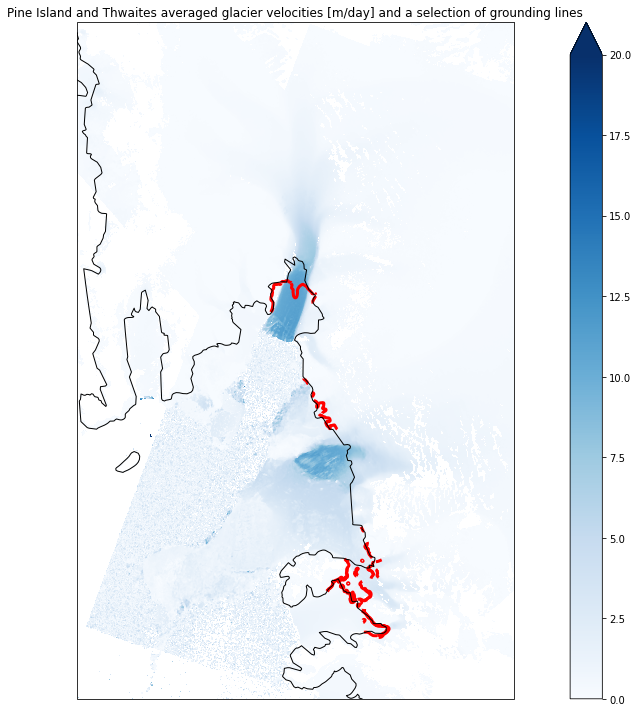

In [79]:
# create a plot of the velocities and grounding lines of Pine Island and Thwaites glacier
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as mpl
import rasterio.plot

mpl.figure(figsize=(16,10))
#note the projection below corresponds to the EPSG 3031 which is the samge projection as used by the ice velocity Geotiff
crs=ccrs.SouthPolarStereo(0,true_scale_latitude=-71)

ax = mpl.subplot(projection=crs)
velo2[0,:,:].plot.imshow(ax=ax,vmin=0,vmax=20,cmap="Blues")

#plot the grounding lines
PinesGLLReproject=PinesGLL.to_crs(crs.proj4_init)
ax.add_geometries(PinesGLLReproject.geometry,crs=crs,edgeColor='red',faceColor='none',lineWidth=3)
ax.coastlines(resolution='10m')

ax.set_title("Pine Island and Thwaites averaged glacier velocities [m/day] and a selection of grounding lines")


# Questions
1. Can you identify the glacier front and grounding line of the Pine Island glacier?
2. The grounding line for the Thwaites glacier is not shown, were would you expect to find it?
3. Bonus: Try to plotting a scale bar to get an idea for the dimensions. 